# ANALYSIS FOR WHETHER DATASET

# TUJUAN ANALISIS: PREDIKSI TEMPERATUR 10 JAM KEDEPAN

Memprediksi suhu harian di Indonesia dengan menggunakan CDD dataset from Kaggle dataset.        
(https://www.kaggle.com/datasets/gauravsahani/timeseries-analysis-for-whether-dataset)

# BISNIS UNDERSTANDING

## 1. Latar Belakang

Iklim dan cuaca berperan penting dalam kehidupan sehari-hari kita. Cuaca, yang menyebabkan fenomena atmosfer seperti suhu, kelembapan, dan curah huja, memiliki dampak langsung pada aktivitas manusia seperti transportasi, pertania, dan kesehatan. Dalam jangka panjang, jumlah hujan yang turun dalam periode waktu tertentu menentukan kondisi lingkungan yang mempengaruhi kelangsungan fungsi ekosistem.

Dengan kemajuan teknologi, prediksi cuaca telah menjadi lebih akurat dengan penggunaan data historis, algoritma canggih, dan model atmosfer global. Cuaca dapat ditentukan menggunakan instrumen seperti termometer, barometer, dan satelit. Data ini digunakan dengan model matematis untuk memprediksi kondisi atmosfer di masa depan.

Salah satu aspek terpenting dalam meramalkan cuaca adalah mengidentifikasi pola-pola kompleks yang dipengaruhi oleh berbagai faktor seperti cuaca, angin, dan interaksi atmosfer dengan lautan. Studi tentang metode prediksi yang lebih akurat, seperti pembelajaran mesin, semakin menjadi penting.

## 2. Rumusan Masalah

- Bagaimana Memprediksi temperatur per jam Berdasarkan Data Waktu cuaca?
- Sejauh Mana Model Prediktif Dapat Diintegrasikan ke dalam Praktik untuk Mendukung Deteksi temperatur?
- Faktor yang mempengaruh akurasi prediksi temperatur?

## 3. Tujuan

- Membangun dan melatih model machine learning yang dapat memprediksi cuaca.
- Menggunakan algoritma yang sesuai untuk mencapai akurasi prediksi yang optimal.
- Menganalisis hasil prediksi model untuk mengidentifikasi pola cuaca yang berguna untuk merencanakan waktu panan berdasarkan prediksi suhu dan kelembapan.


# DATA UNDERSTANDING (MEMAHAMI DATA)

Data tersebut berfokus pada kualitas udara di yogyakarta. Indikator yang digunakan dalam data tersebut yaitu PM10, PM2.5, SO2, CO, O3, NO2, Max, Critical Component.

Penjelasan teori Attribute dalam data:

Referensi dari buku yang berjudul "Data Mining Concepts and Techniques" edisi ketiga.

link : https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Dalam buku tersebut menjelaskan bahwa : Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Kata atribut, dimensi, fitur, dan variabel sering digunakan secara bergantian dalam literatur. Istilah dimensi umumnya digunakan dalam data warehousing. Pembelajaran mesin literatur cenderung menggunakan istilah fitur, sedangkan ahli statistik lebih memilih istilah variabel. Data profesional pertambangan dan basis data biasanya menggunakan istilah atribut, dan kami melakukannya di sini demikian juga. Atribut yang mendeskripsikan objek pelanggan dapat mencakup, misalnya, ID pelanggan, Nama dan alamat. Nilai yang diamati untuk atribut tertentu dikenal sebagai observasi. Satu set Atribut yang digunakan untuk mendeskripsikan objek tertentu disebut vektor atribut (atau vektor fitur). Distribusi data yang melibatkan satu atribut (atau variabel) disebut univariat. Distribusi bivariat melibatkan dua atribut, dan seterusnya.

Untuk menganalisis Kualitas udara
- Fitur: "Temperature" dengan tipe data Numerik, adalah Berisi nilai suhu dalam satuan tertentu (seperti Celsius atau Fahrenheit).
- Fitur: "Humidity" dengan tipe data Numerik, adalah Persentase kelembapan relatif (%), dalam bentuk nilai numerik antara 0 dan 1
- Fitur: "Dew_point" dengan tipe data Numerik, adalah Titik embun, biasanya dalam satuan suhu (Celsius atau Fahrenheit)
- Fitur: "Wind_bearing" dengan tipe data Numerik, adalah Arah angin dalam derajat (0–360), menunjukkan arah datangnya angin
- Fitur: "Wind_speed" dengan tipe data Numerik, adalah Kecepatan angin dalam unit tertentu (seperti meter per detik atau mil per jam).
- Fitur: "Wind_gust" dengan tipe data Numerik, adalah Kecepatan hembusan angin maksimum dalam unit tertentu
- Fitur: "Pressure" dengan tipe data Numerik, adalah Tekanan atmosfer dalam unit tertentu (seperti hPa atau mmHg).
- Fitur: "UV_index" dengan tipe data Numerik, adalah Indeks sinar UV, biasanya dalam skala numerik (0 hingga 11+).
- Fitur: "Ozone" dengan tipe data Numerik, adalah Konsentrasi ozon di atmosfer, biasanya dalam satuan Dobson.

## Collecting data

Setelah mencari data kemudian melakukan import data ke dataframe

Kemudian menampilkan seluruh baris data di dataframe df_main

In [477]:
import pandas as pd

file_path = 'Whether_Dataset.csv'

df_main = pd.read_csv(file_path)

df_main

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32,0,6.13,319,3.77,4.50,1011.58,5,274.5,0.0,clear-day
495,21-10-2019 15:00,32,0,5.74,321,4.08,5.20,1010.65,3,274.7,0.0,clear-day
496,21-10-2019 16:00,32,0,6.05,323,3.94,5.68,1010.31,1,274.9,0.0,clear-day
497,21-10-2019 17:00,31,0,6.85,326,3.61,6.08,1010.73,0,275.7,0.0,clear-day


Melihat Visualisasi data awal, menentukan apakah data terdapat anomali

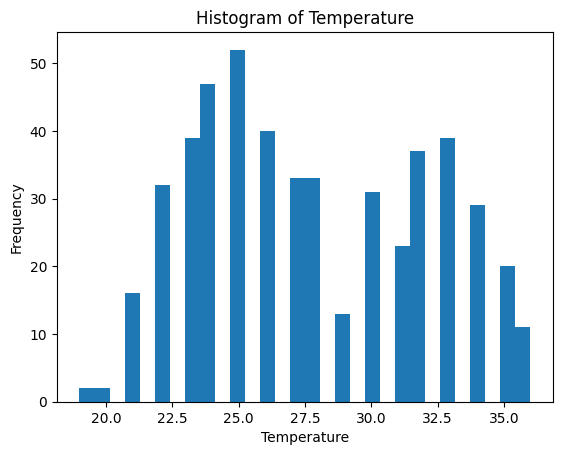

In [478]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('Whether_Dataset.csv')

df['temperature'].plot(kind='hist', bins=30, title='Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


Melihat Visualisasi Distribusi untuk setiap Fitur

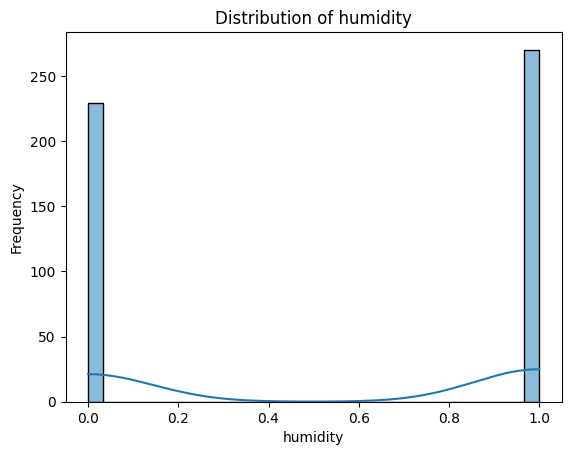

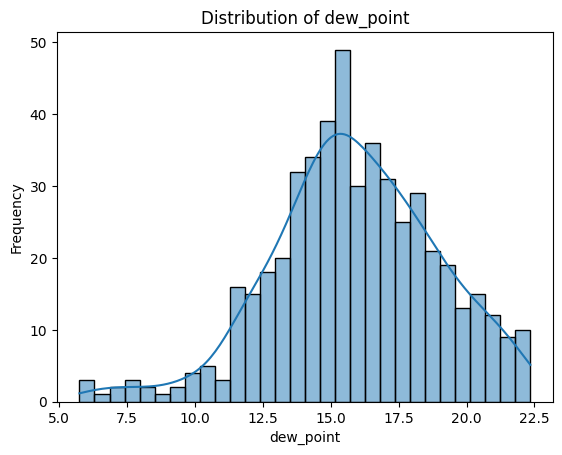

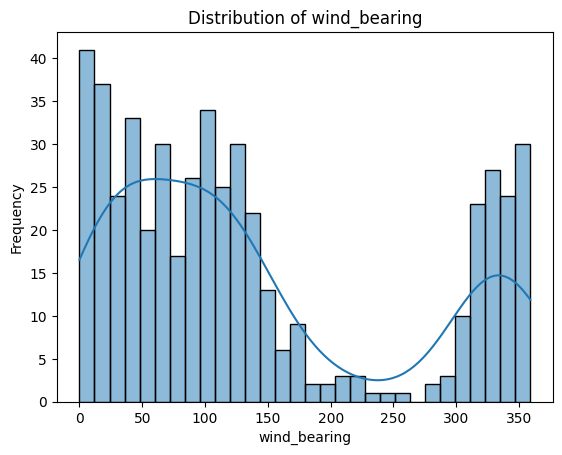

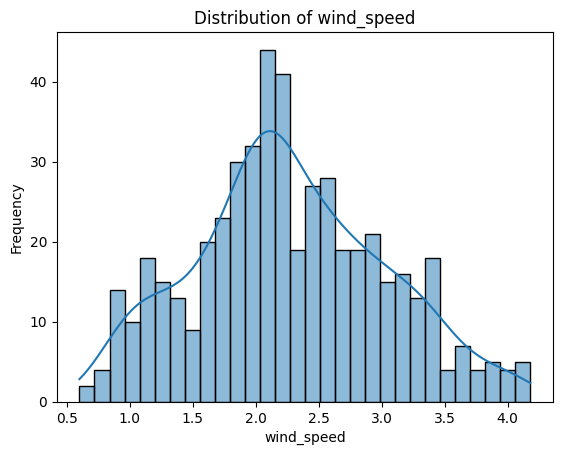

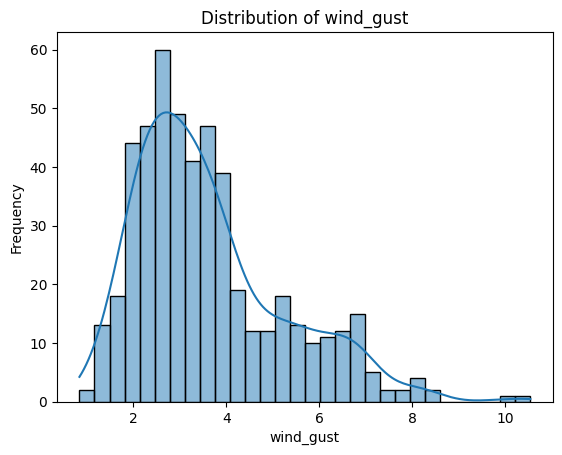

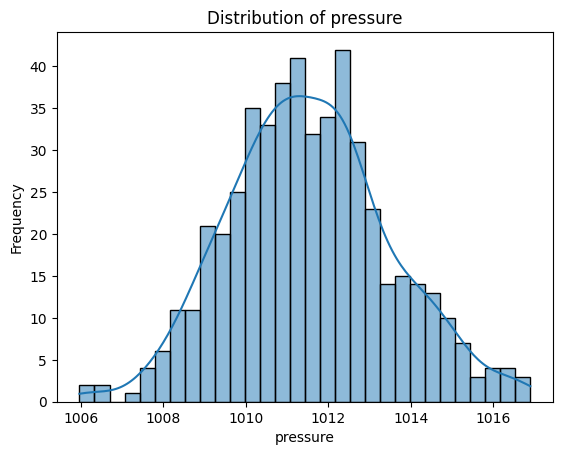

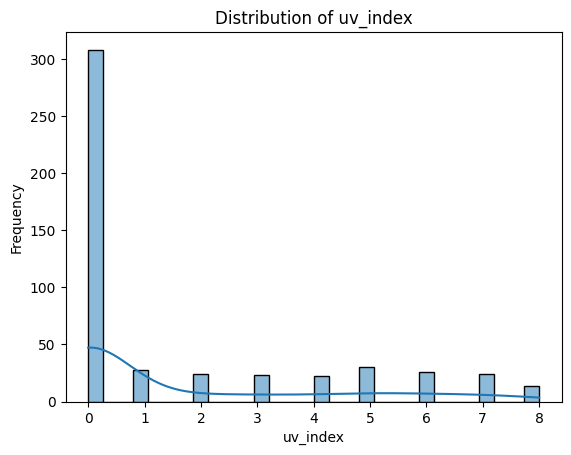

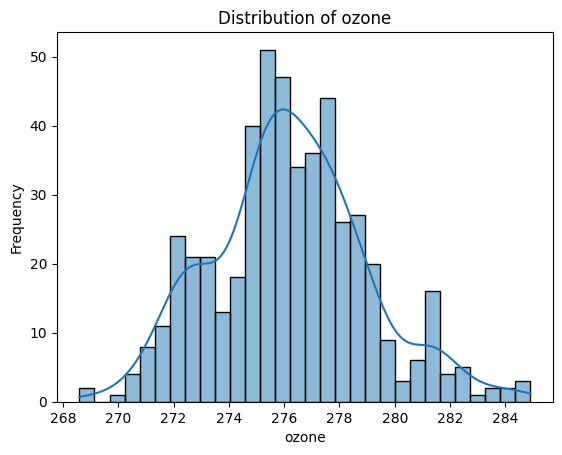

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

features = ['humidity', 'dew_point', 'wind_bearing', 'wind_speed', 
            'wind_gust', 'pressure', 'uv_index', 'ozone']

for feature in features:
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Data Overview (Identifikasi Data)

Konsep macam-macam tipe data

Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Hal ini berarti atribut, dimensi, fitur, dan variabel yang sering digunakan secara bergantian dalam literatur.

- Nominal attributes: atribut yang nilainya berupa simbol atau nama yang merepresentasikan kategori atau status tertentu tanpa urutan yang berarti.
- Binary attributes: atribut nominal dengan dua kategori atau status, biasanya 0 dan 1.
- Ordinal attributes: atribut yang nilainya memiliki urutan yang berarti atau ranking, namun selisih antara nilai-nilai tersebut tidak diketahui.
- Numeric attributes: atribut kuantitatif yang diukur dalam nilai integer atau real.

Mengamati secara langsung dari data yang diperoleh dari Climate Data Daily IDN dataset dan mendeskripsikan langsung jumlah kolom, nama kolom, jumlah data, missing values, dan type data dari setiap kolom data tersebut

In [480]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime_local    499 non-null    object 
 1   temperature       499 non-null    int64  
 2   humidity          499 non-null    int64  
 3   dew_point         499 non-null    float64
 4   wind_bearing      499 non-null    int64  
 5   wind_speed        499 non-null    float64
 6   wind_gust         499 non-null    float64
 7   pressure          499 non-null    float64
 8   uv_index          499 non-null    int64  
 9   ozone             499 non-null    float64
 10  precip_intensity  499 non-null    float64
 11  icon              499 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 46.9+ KB


In [481]:
df_main.describe()

,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,27.797595,0.541082,15.871303,139.523046,2.267114,3.616974,1011.535411,1.641283,276.195792,0.009820
std,4.305725,0.498809,3.065238,118.438353,0.755191,1.608687,1.932765,2.493683,2.788063,0.036247
min,19.000000,0.000000,5.740000,0.000000,0.600000,0.840000,1005.970000,0.000000,268.600000,0.000000
25%,24.000000,0.000000,14.025000,44.000000,1.780000,2.460000,1010.235000,0.000000,274.600000,0.000000
50%,27.000000,1.000000,15.710000,105.000000,2.200000,3.220000,1011.430000,0.000000,276.100000,0.000000
75%,32.000000,1.000000,17.990000,217.500000,2.780000,4.345000,1012.675000,3.000000,277.800000,0.000000
max,36.000000,1.000000,22.350000,359.000000,4.180000,10.540000,1016.900000,8.000000,284.900000,0.420000


Dari hasil kode diatas yang merupakan tabel dari dataset, kita bisa menyimpulkan bahwa data ini memiliki 499 baris dan 10 kolom

Untuk fitur dari dataset tersebut ada 9 yaitu seperti yang disebutkan diatas: humidity, dew_point, wind_bearing, wind_speed, wind_gust, pressure, uv_index, ozone Sedangkan untuk targetnya adalah temperature.

Penjelasan dari setiap fitur yang ada pada tabel diatas:

- target: "Temperature" dengan tipe data Numerical, adalah prediksi suhu harian dalam mempertimbangkan fitur sebelumnya

Numerical Variable: humidity, dew_point, wind_bearing, wind_speed, wind_gust, pressure, uv_index, ozone, temperature.

In [482]:
import numpy as np

Melihat Visualisasi grafik time series dari temperature harian dari waktu ke waktu.

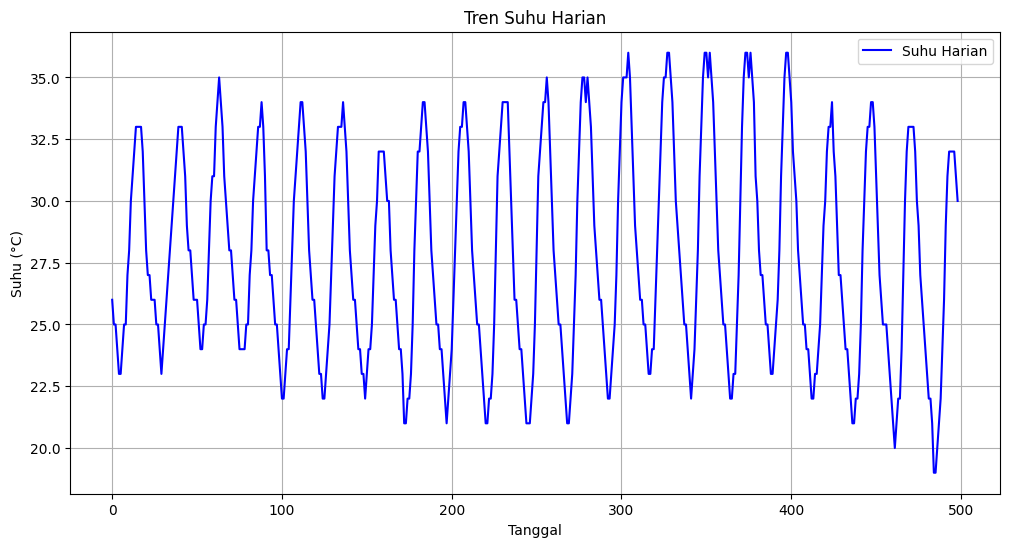

In [483]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(df_main.index, df_main['temperature'], label='Suhu Harian', color='blue')
plt.title('Tren Suhu Harian')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid()
plt.show()

Seperti di lihat pada Visualisasi grafik time series di atas temperature naik turun

### Korekasi fitur

Visualisasi Korelasi Antar Fitur dan Target. pada awal analisis korelasi antar fitur disini menujukkan 1 fitur yitu uv_index yang punya korelasi terbalik yang tinggi terhadap TP (temperature)


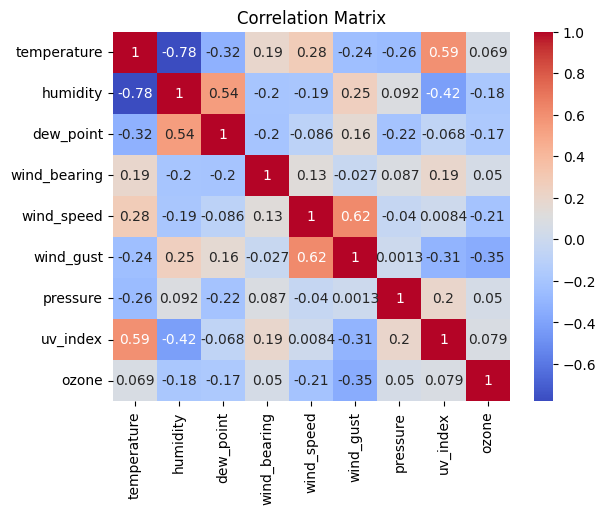

In [484]:
correlation_matrix = df_main[['temperature'] + features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Kualitas Data

### Distribusi data

Dari grafik sepertinya tidak ada data yang aneh distribusinya

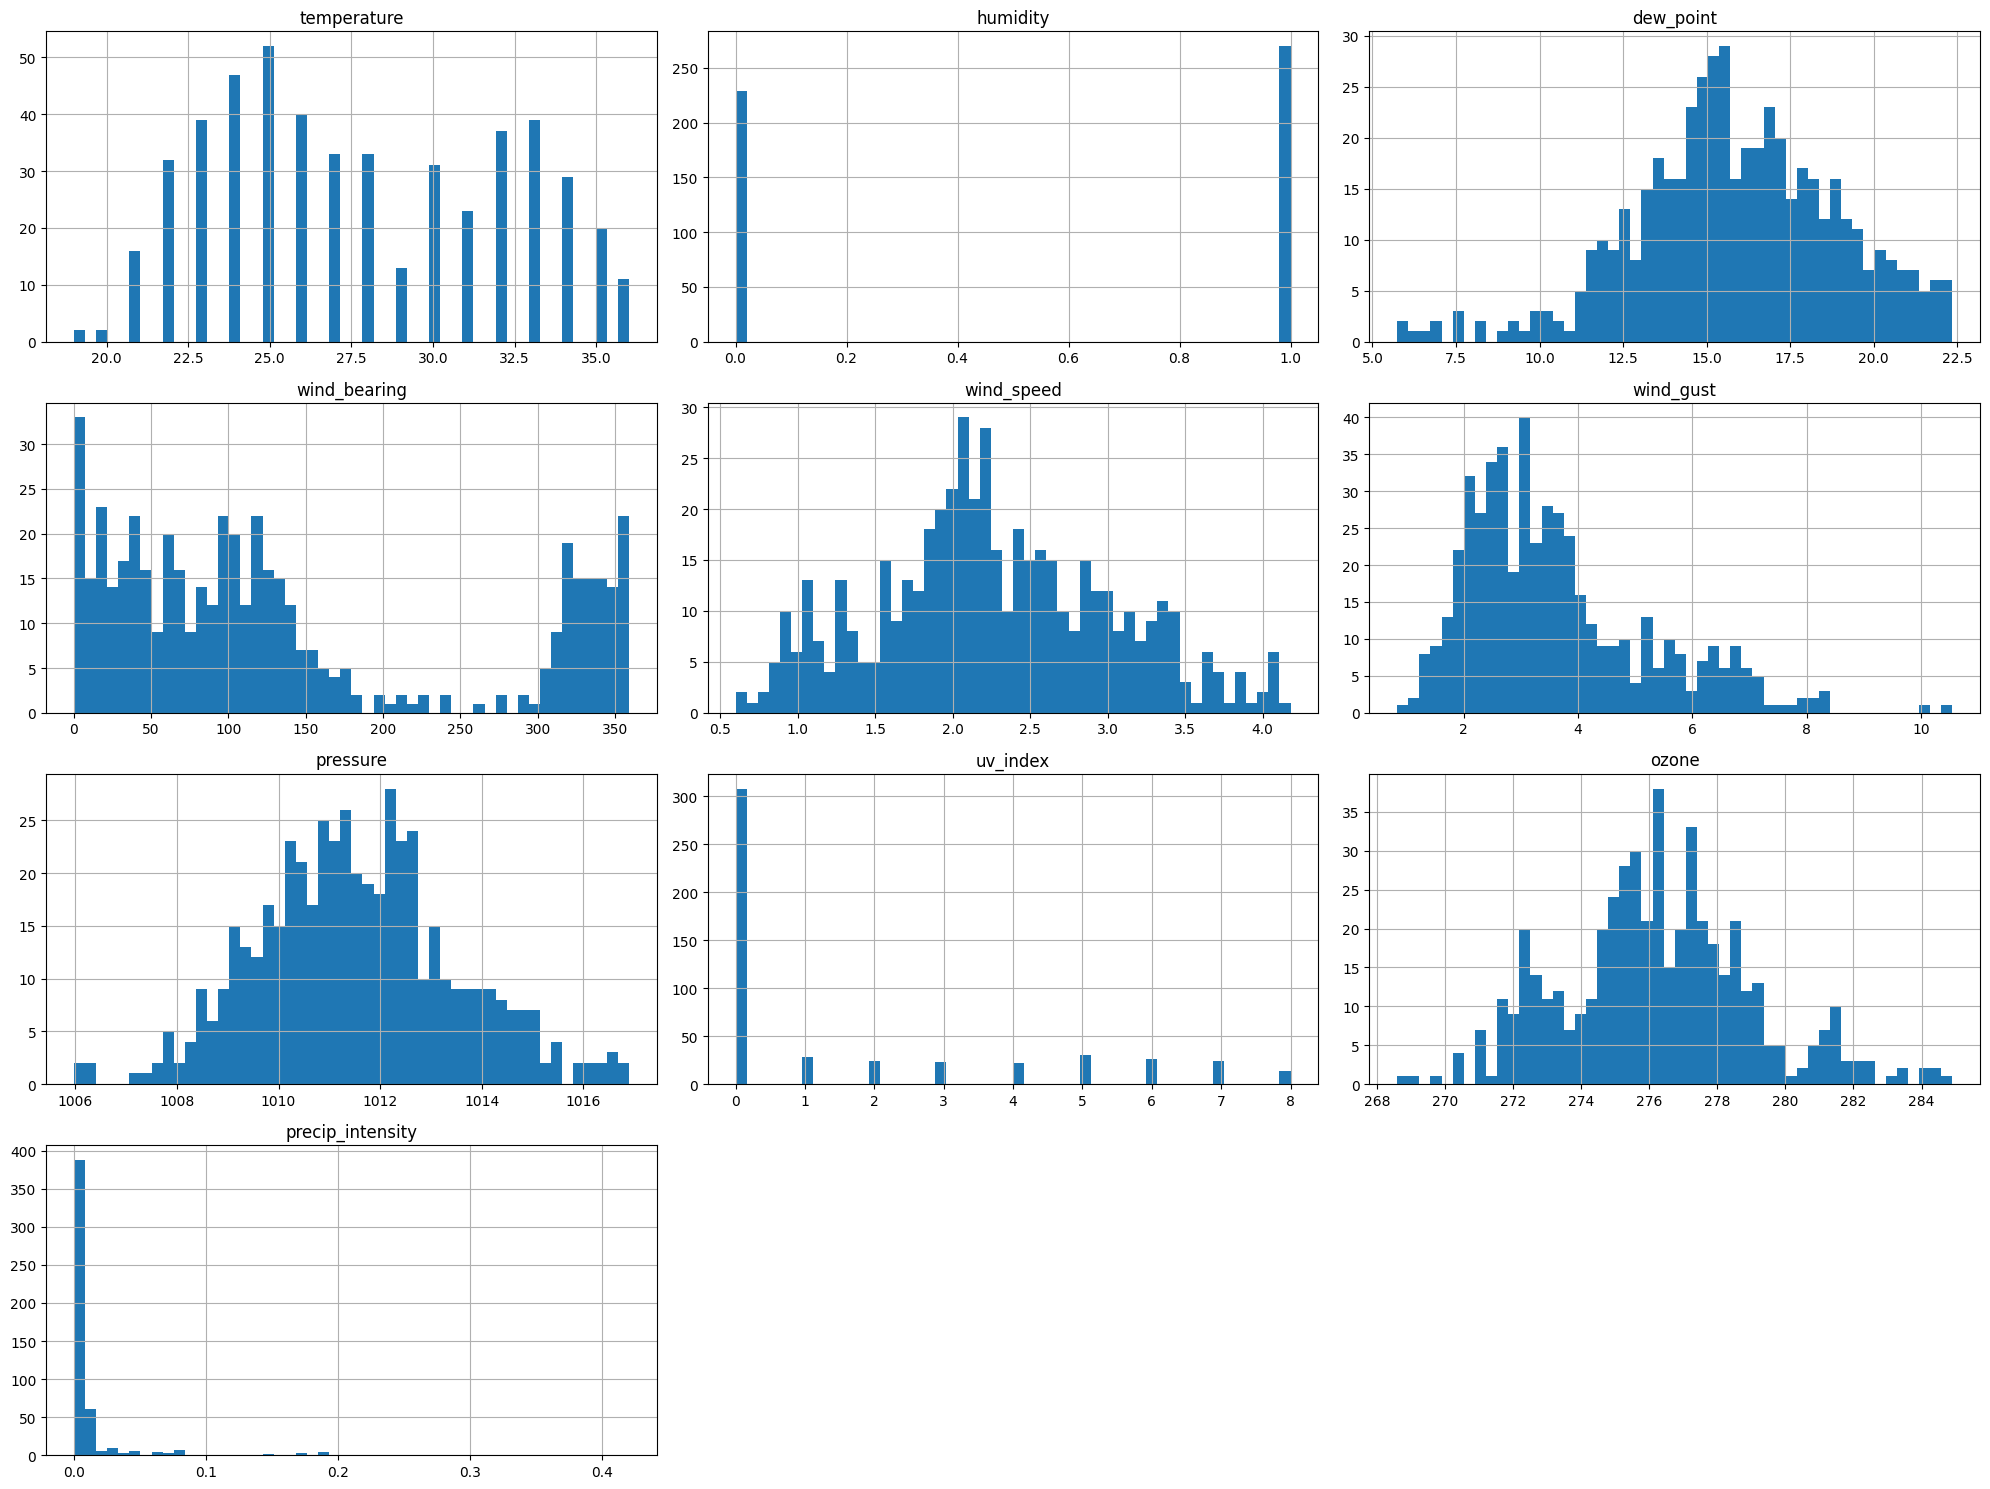

In [485]:
df_main.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Missing Value

Mencari missing value apakah ada missing value di data ini

datetime_local      0
temperature         0
humidity            0
dew_point           0
wind_bearing        0
wind_speed          0
wind_gust           0
pressure            0
uv_index            0
ozone               0
precip_intensity    0
icon                0
dtype: int64


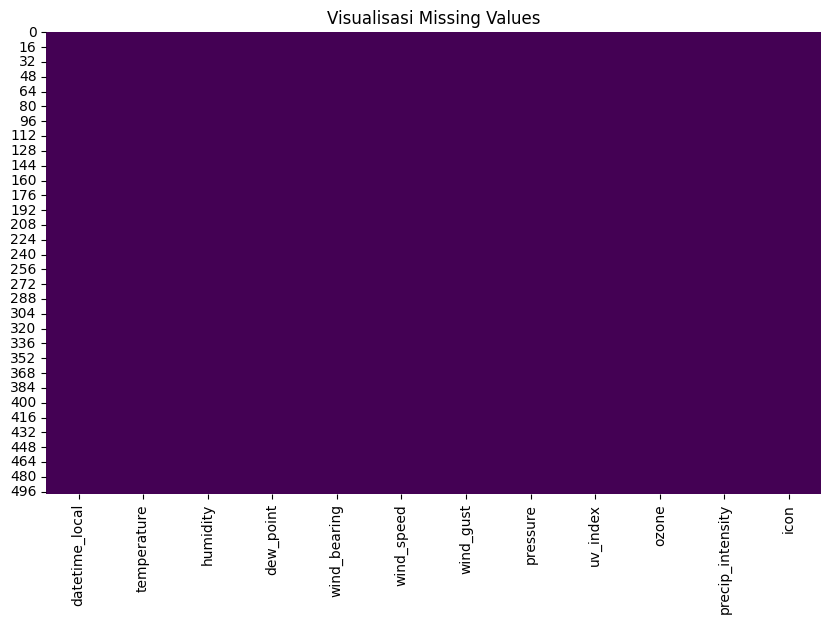

In [486]:
print(df_main.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df_main.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

In [487]:
missing_values = df_main.isnull()
missing_values.head(len(missing_values))

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False


Karena tidak terdapat missing values dalam data tersebut, kita dapat menganggap data telah bersih sehingga tidak perlu dilakukan inputasi missing values. 

### Outliers

Lalu, saya melakukan deteksi outlier, untuk memperbaiki kualitas data.

Menurut referensi yang didapat dari buku "Data Mining : Concept and Technique":

Link:
https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Local Outlier Factor (LOF) adalah metode deteksi outlier yang didasarkan pada kepadatan lokal suatu titik data dalam kaitannya dengan tetangga terdekatnya. Metode ini bertujuan untuk mengidentifikasi outlier lokal dengan membandingkan kepadatan lokal dari suatu titik dengan kepadatan lokal dari tetangga-tetangganya. Berikut adalah komponen utama dan langkah-langkah perhitungan dalam LOF:

#### 1. K-Tetangga Terdekat (K-Nearest Neighbors, K-NN)

- **Jarak K (k-distance)**: Jarak dari titik $ o $ ke tetangga terdekat ke-k.
  $$
  \text{k-distance}(o) = \text{dist}(o, o_k)
  $$
  di mana $ o_k $ adalah tetangga terdekat ke-k dari $ o $.

- **Lingkungan Jarak K (k-distance neighborhood)**: Himpunan titik-titik yang berada dalam jarak K dari $ o $.
  $$
  N_k(o) = \{ o' \mid \text{dist}(o, o') \leq \text{k-distance}(o) \}
  $$

#### 2. Jarak Jangkauan (Reachability Distance)

Jarak jangkauan dari titik $ o' $ ke titik $ o $ didefinisikan sebagai:
$$
\text{reachdist}_k(o', o) = \max(\text{k-distance}(o), \text{dist}(o', o))
$$

#### 3. Kepadatan Jangkauan Lokal (Local Reachability Density)

Kepadatan jangkauan lokal $ lrd_k(o) $ dari titik $ o $ adalah kebalikan dari rata-rata jarak jangkauan dari tetangga terdekatnya:
$$
lrd_k(o) = \frac{|N_k(o)|}{\sum_{o' \in N_k(o)} \text{reachdist}_k(o', o)}
$$

#### 4. Faktor Outlier Lokal (Local Outlier Factor)

Faktor outlier lokal $ LOF_k(o) $ dari titik $ o $ adalah rata-rata dari rasio kepadatan jangkauan lokal $ o $ terhadap kepadatan jangkauan lokal dari tetangga terdekatnya:
$$
LOF_k(o) = \frac{\sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}}{|N_k(o)|}
$$

Data outlier sering kali mempengaruhi model data secara umum sehingga pengaruh dari data outlier tersebut. setelah di cek menggunakan LOF terdapat outlier

Proses perhitungan LOF untuk mendeteksi adanya outlier dengan 20 tetangga terdekat menggunakan contamination.

Disini saya akan mencoba mendeteksi outlier dengan LOF score dari sklearn, dimana LOF score -1 akan dianggap outlier. Menampilkan beberapa data yang teridentifikasi sebagai outlier (dengan skor LOF negatif).

In [488]:
numerical_cols = df_main.select_dtypes(include=['float64', 'int64']).columns.tolist()

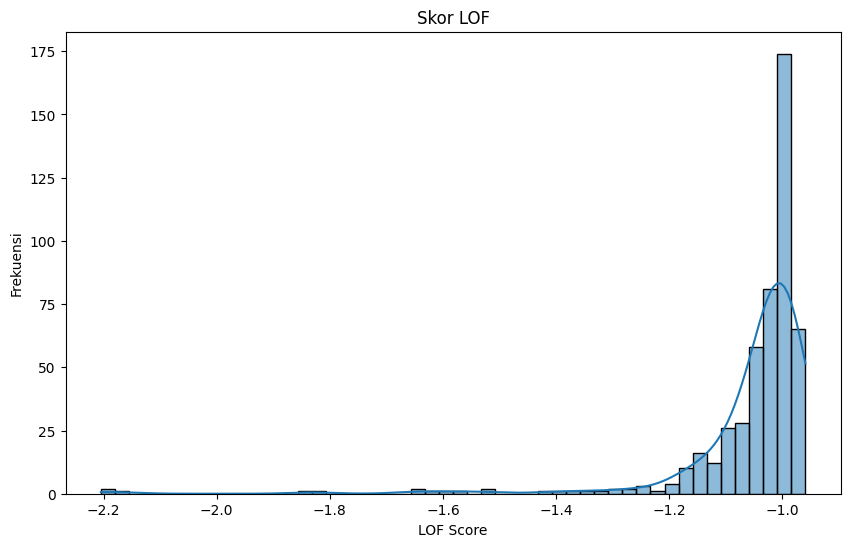

In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# Model LOF
n_neighbors = 20
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.05)

# Menghitung outlier dan skor LOF
y_pred = lof.fit_predict(df_main[numerical_cols])
lof_scores = lof.negative_outlier_factor_

# Menambahkan kolom LOF Score dan Outlier ke DataFrame
df_main['LOF_Score'] = lof_scores
df_main['Outlier'] = y_pred

# Menampilkan data outlier
outliers = df_main[df_main['Outlier'] == -1]


# Visualisasi distribusi skor LOF
plt.figure(figsize=(10, 6))
sns.histplot(df_main['LOF_Score'], bins=50, kde=True)
plt.title('Skor LOF')
plt.xlabel('LOF Score')
plt.ylabel('Frekuensi')
plt.show()


In [490]:
outliers

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon,LOF_Score,Outlier
13,01-10-2019 13:00,32,1,20.52,60,2.03,2.03,1008.35,5,271.6,0.01,partly-cloudy-day,-1.263820,-1
128,06-10-2019 08:00,25,1,18.51,239,0.95,1.04,1012.34,1,277.0,0.00,partly-cloudy-day,-1.649981,-1
129,06-10-2019 09:00,27,1,17.99,223,1.15,1.47,1012.58,2,276.5,0.00,partly-cloudy-day,-1.655098,-1
161,07-10-2019 17:00,31,0,16.33,278,2.83,3.98,1011.24,0,279.6,0.00,partly-cloudy-day,-2.157886,-1
173,08-10-2019 05:00,21,1,13.99,299,1.68,3.02,1010.81,0,277.6,0.00,clear-night,-1.394596,-1
175,08-10-2019 07:00,22,1,16.55,294,1.35,2.58,1012.55,0,275.9,0.00,clear-day,-1.522190,-1
176,08-10-2019 08:00,23,1,17.03,276,1.85,3.02,1013.21,1,275.1,0.00,clear-day,-2.196089,-1
177,08-10-2019 09:00,25,1,17.27,221,2.30,3.39,1013.52,3,274.7,0.00,clear-day,-1.623693,-1
180,08-10-2019 12:00,32,0,16.19,303,3.33,3.85,1012.45,8,276.4,0.00,clear-day,-1.211320,-1
247,11-10-2019 07:00,22,1,17.78,194,0.81,1.28,1011.85,0,282.0,0.00,clear-day,-1.296640,-1


Berdasarkan output, terlihat bahwa terdapat 25 data outlier. Disini saya tidak menghapus data outlier. Namun disni saya melakukan interpolasi data. Cara kerja interpolasi data menghapus nilai outlier terlebih dahulu kemudian mengisi data dengan rata rata samping kanan kiri yang sudah di hapus. Hasil rata rata tersebut diisi.

# DATA PREPROCESSING (PREPROSES DATA)

Pada data preprocessing saya akan memperbaiki kualitas data karena terdeteksi adanya outlier pada data.

### Mengatasi Outlier

Untuk Outlier saya menggunakan interpolasi linier untuk mengganti data aneh

In [491]:
df_outliers = df_main[df_main['Outlier'] == -1].copy()
df_inliers = df_main[df_main['Outlier'] == 1].copy()

print(f"Jumlah outlier: {df_outliers.shape[0]}")
print(f"Jumlah inlier: {df_inliers.shape[0]}")


Jumlah outlier: 25
Jumlah inlier: 474


Interpolasi Linear


In [492]:
numerical_cols = df_main.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [493]:
df_interpolated = df_main.copy()
df_interpolated.loc[df_interpolated['Outlier'] == -1, numerical_cols] = pd.NA

Hasil setelah outlier sudah dilakukan interpolasi data. Bisa di lihat di bawah tidak ada outlier

In [494]:
df_interpolated

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon,LOF_Score,Outlier
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night,-1.051859,1
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night,-1.016465,1
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night,-1.016189,1
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night,-1.009082,1
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night,-1.016832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,6.13,319.0,3.77,4.50,1011.58,5.0,274.5,0.0,clear-day,-1.000089,1
495,21-10-2019 15:00,32.0,0.0,5.74,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day,-0.999370,1
496,21-10-2019 16:00,32.0,0.0,6.05,323.0,3.94,5.68,1010.31,1.0,274.9,0.0,clear-day,-1.001588,1
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day,-1.013378,1


In [495]:
df_interpolated[numerical_cols] = df_interpolated[numerical_cols].interpolate(method='linear')

df_main.loc[df_main['Outlier'] == -1, numerical_cols] = df_interpolated.loc[df_main['Outlier'] == -1, numerical_cols]


C:\Users\NikiR\AppData\Local\Temp\ipykernel_39020\192401795.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[32.         25.66666667 27.33333333 31.         21.5        23.5
 25.         26.5        31.         22.         32.         29.33333333
 31.66666667 29.6        31.2        32.8        34.4        34.
 35.         34.75       34.5        34.25       19.5        22.66666667
 24.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_main.loc[df_main['Outlier'] == -1, numerical_cols] = df_interpolated.loc[df_main['Outlier'] == -1, numerical_cols]
C:\Users\NikiR\AppData\Local\Temp\ipykernel_39020\192401795.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.5        1.         1.         0.         1.         1.
 1.         1.         0.         1.         0.     

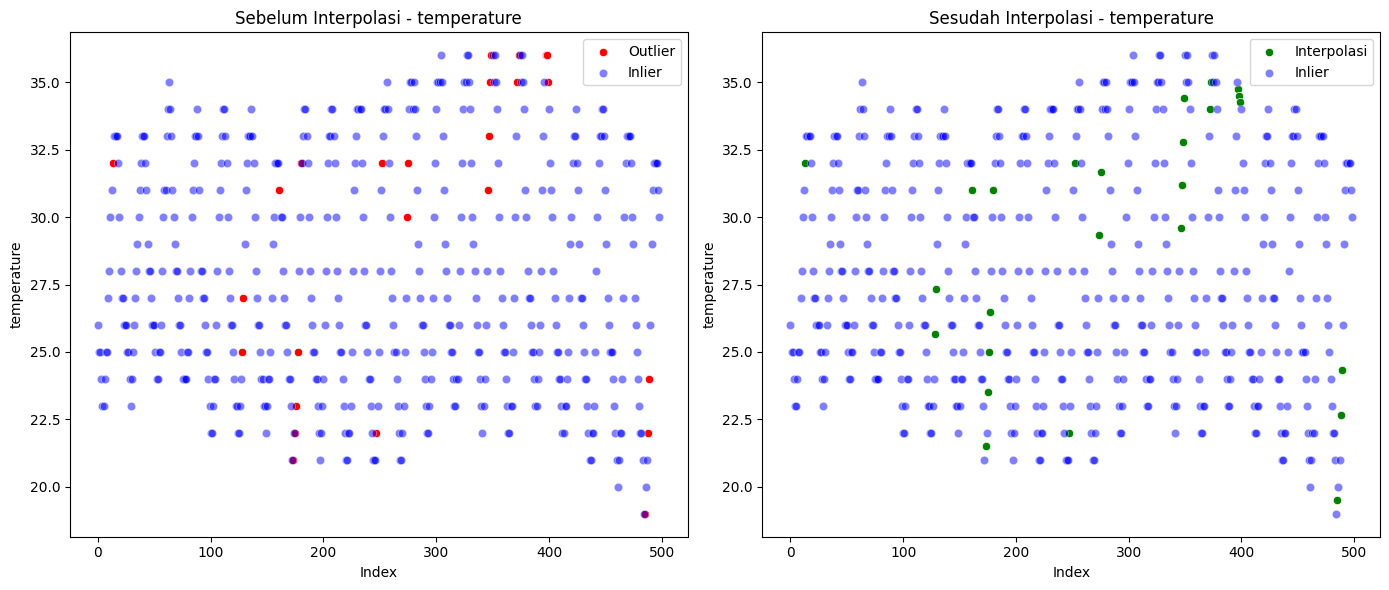

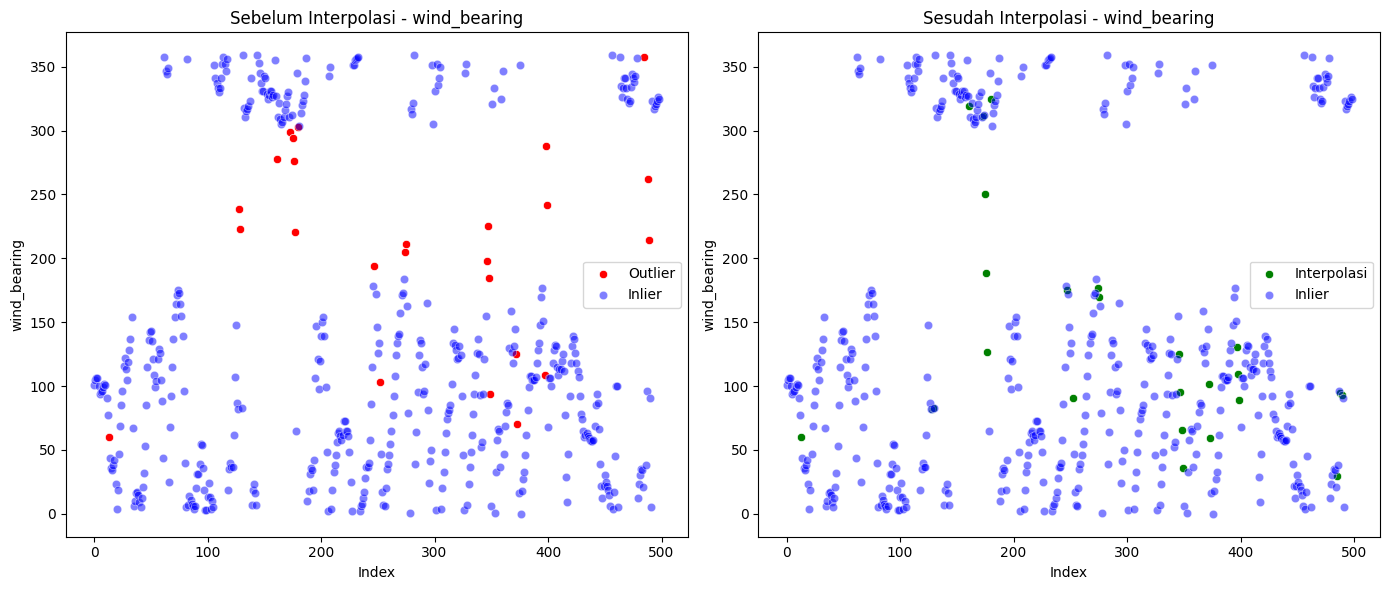

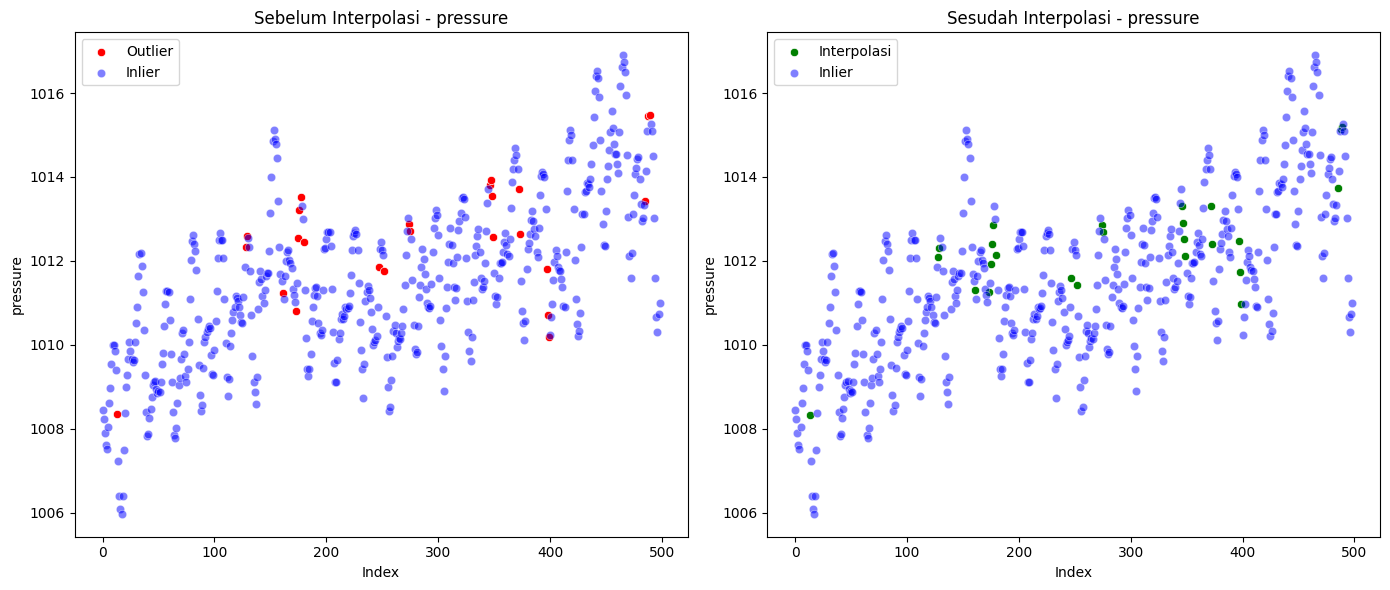

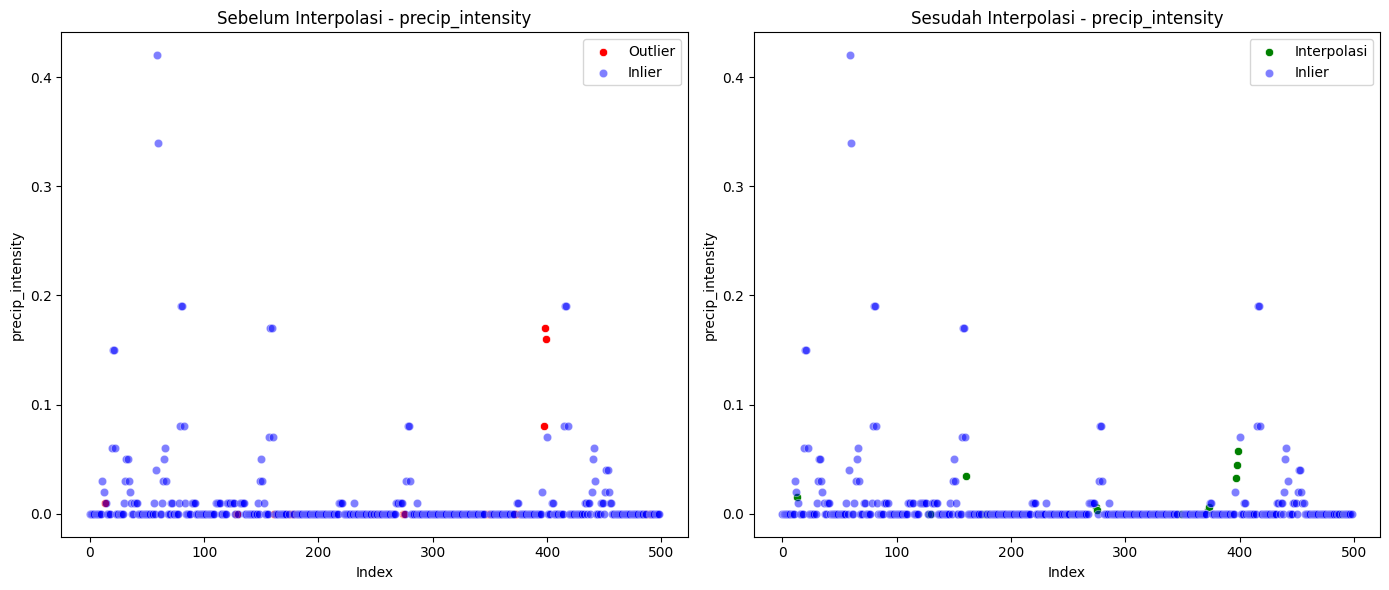

In [496]:

cols_to_plot = numerical_cols[::3] 

for col in cols_to_plot:
    plt.figure(figsize=(14,6))
    
    # Plot sebelum interpolasi
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df_outliers.index, y=df_outliers[col], color='red', label='Outlier')
    sns.scatterplot(x=df_inliers.index, y=df_inliers[col], color='blue', alpha=0.5, label='Inlier')
    plt.title(f'Sebelum Interpolasi - {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    
    # Plot setelah interpolasi
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df_main[df_main['Outlier'] == -1].index, y=df_main[df_main['Outlier'] == -1][col], color='green', label='Interpolasi')
    sns.scatterplot(x=df_inliers.index, y=df_inliers[col], color='blue', alpha=0.5, label='Inlier')
    plt.title(f'Sesudah Interpolasi - {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Seleksi Fitur

Mengidentifikasi hubungan antar fitur dan target: Nilai korelasi menunjukkan seberapa erat hubungan antar fitur dan target (skala antara -1 dan 1).

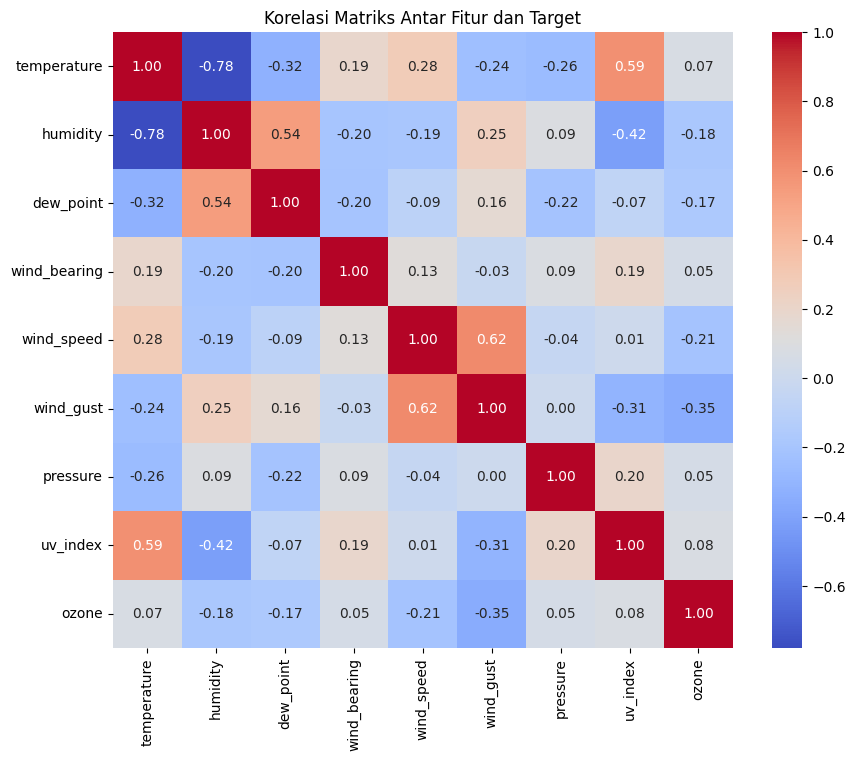

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Korelasi Matriks Antar Fitur dan Target')
plt.show()

disini fitur yang saya pilih :
- uv_index
- humidity

In [498]:
selected_df = df_main[['humidity','uv_index', 'temperature','datetime_local']]
selected_df.set_index("datetime_local", inplace=True)
selected_df

,humidity,uv_index,temperature
datetime_local,,,
01-10-2019 00:00,1.0,0.0,26.0
01-10-2019 01:00,1.0,0.0,25.0
01-10-2019 02:00,1.0,0.0,25.0
01-10-2019 03:00,1.0,0.0,24.0
01-10-2019 04:00,1.0,0.0,23.0
...,...,...,...
21-10-2019 14:00,0.0,5.0,32.0
21-10-2019 15:00,0.0,3.0,32.0
21-10-2019 16:00,0.0,1.0,32.0


### Menyiapkan Data untuk Recursive Multi-step Forecasting

Recursive Multi-step Forecasting adalah pendekatan dalam prediksi deret waktu (time series forecasting) yang digunakan untuk memprediksi nilai lebih dari satu langkah ke depan, tetapi dengan pendekatan bertahap. Pendekatan ini mengandalkan model yang pertama kali memprediksi satu langkah ke depan, kemudian menggunakan prediksi tersebut sebagai input untuk memprediksi langkah berikutnya, dan seterusnya.

In [499]:
from sklearn.preprocessing import StandardScaler # type: ignore

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df)
scaled_df = pd.DataFrame(scaled_features, index=selected_df.index, columns=selected_df.columns)


In [500]:
# Misalnya, 80% data untuk pelatihan dan 20% untuk pengujian
train_size = int(len(scaled_df) * 0.8)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]

### Membuat Input-Output untuk Model Direct Forcasting

Model Direct Forecasting adalah pendekatan dalam prediksi deret waktu (time series forecasting) di mana model dilatih untuk memprediksi nilai secara langsung untuk beberapa langkah ke depan, tanpa menggunakan prediksi sebelumnya sebagai input untuk langkah-langkah berikutnya

Dalam direct forecasting, model memprediksi semua langkah yang diinginkan (misalnya, prediksi untuk t+1, t+2 dan seterusnya) sekaligus, dalam satu langkah pelatihan. Artinya, model menghasilkan output untuk beberapa waktu ke depan secara langsung tanpa iterasi bertahap.

Untuk pendekatan direct multistep, saya akan membuat target prediksi. Misalnya, jika saya ingin memprediksi TP 10 menit ke depan, tentukan berapa interval waktu yang mewakili 10 menit dalam dataset saya.

Namun, umumnya, prediksi multistep dibagi berdasarkan langkah waktu yang konsisten. Misalkan data saya diambil setiap 1 menit, maka 10 langkah ke depan.

In [501]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error # type: ignore
import matplotlib.pyplot as plt # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

In [502]:
def create_multi_output_data(data, target_col, steps=10):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data.iloc[i:i+steps].values)
        y.append(data[target_col].iloc[i+1:i+steps+1].values)  # Prediksi 1 hingga 10 langkah ke depan
    return np.array(X), np.array(y)

Pada Direct Multistep Forecasting, model dirancang untuk memetakan input window ke output window secara langsung. Artinya, model belajar hubungan antara data historis dengan beberapa langkah waktu ke depan dalam satu proses pelatihan. Dengan demikian, saat melakukan prediksi, model dapat menghasilkan 10 prediksi HR sekaligus tanpa perlu memprediksi satu per satu.

Input Window (n steps)   Output Window (m steps)

In [503]:
print("┌─────────────┐              ┌──────────────────┐")
print("│ Step t-n+1  │              │ Step t+1         │")
print("│ Step t-n+2  │              │ Step t+2         │")
print("│ ...         │ ──> Model──> │ ...              │")
print("│ Step t      │              │ Step t+m         │")
print("└─────────────┘              └──────────────────┘")


┌─────────────┐              ┌──────────────────┐
│ Step t-n+1  │              │ Step t+1         │
│ Step t-n+2  │              │ Step t+2         │
│ ...         │ ──> Model──> │ ...              │
│ Step t      │              │ Step t+m         │
└─────────────┘              └──────────────────┘


- Input Window: Sekuens data historis sebanyak n langkah waktu (misalnya, 10 menit terakhir).
- Output Window: Sekuens data target sebanyak m langkah waktu (misalnya, 10 menit ke depan).

In [504]:

steps = 10  # Jumlah langkah waktu
X_train, y_train = create_multi_output_data(train, 'temperature', steps)
X_test, y_test = create_multi_output_data(test, 'temperature', steps)

| Aspek                                                                           | Direct Multistep Forecasting                                          | Recursive Multistep Forecasting                                                          |
| ------------------------------------------------------------------------------- | --------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| Jumlah Prediksi Langsung                                                        | Beberapa langkah waktu (m langkah) sekaligus                          | Satu langkah waktu (1 langkah) setiap kali memprediksi                                   |
| Kompleksitas Model Lebih kompleks karena menghasilkan beberapa output sekaligus | Lebih sederhana karena hanya menghasilkan satu output per langkah     |
| Akumulasi Kesalahan                                                             | Lebih rendah karena semua prediksi dihasilkan dalam satu langkah      | Lebih tinggi karena setiap prediksi bergantung pada prediksi sebelumnya                  |
| Efisiensi Waktu                                                                 | Lebih efisien karena hanya satu kali prediksi untuk m langkah waktu   | Kurang efisien karena memerlukan m kali prediksi untuk m langkah waktu                   |
| Penggunaan Data                                                                 | Menggunakan data historis untuk menghasilkan semua prediksi sekaligus | Menggunakan data historis dan prediksi sebelumnya untuk menghasilkan prediksi berikutnya |


# MODELLING

## LSTM

Menggunakan LSTM dengan satu lapisan tersembunyi dan lapisan Dropout untuk mencegah overfitting. Output layer memiliki 10 neuron untuk menghasilkan 10 prediksi sekaligus.

In [505]:

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(steps, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(steps))  # Output layer dengan 10 unit untuk 10 langkah ke depan

# Mengompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

model.summary()

c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100)            │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,610 (166.45 KB)

 Trainable params: 42,610 (166.45 KB)

 Non-trainable params: 0 (0.00 B)

Penjelasan:

- LSTM Layer: Menangkap dependensi temporal dalam data.
- Dropout Layer: Mencegah overfitting dengan mengabaikan neuron secara acak selama pelatihan.
- Dense Layer: Menghasilkan 10 output, masing-masing untuk 10 menit ke depan.

Menggunakan Early Stopping untuk menghentikan pelatihan saat model tidak lagi meningkatkan performa pada data validasi.

In [506]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9366 - mae: 0.8355 - mape: 102.4496 - val_loss: 0.8984 - val_mae: 0.8436 - val_mape: 91.5903
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6730 - mae: 0.7074 - mape: 99.3073 - val_loss: 0.3686 - val_mae: 0.4947 - val_mape: 79.2752
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2576 - mae: 0.4037 - mape: 106.8318 - val_loss: 0.1358 - val_mae: 0.2843 - val_mape: 44.5711
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1465 - mae: 0.3030 - mape: 79.8576 - val_loss: 0.0621 - val_mae: 0.1900 - val_mape: 32.0198
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1090 - mae: 0.2599 - mape: 77.0738 - val_loss: 0.0728 - val_mae: 0.2059 - val_mape: 33.1904
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0923 - mae: 0.2384 - mape: 63.7353 - val_loss: 0.0539 - val_mae: 0.1761 - val_mape: 28.2831
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0796 - mae: 0.2210

In [507]:
from sklearn.preprocessing import StandardScaler
import joblib
model.save('hr_prediction_model.keras')
joblib.dump(scaler, 'scaler.save')


['scaler.save']

In [508]:
# Misalnya, 80% data untuk pelatihan dan 20% untuk pengujian
train_size = int(len(scaled_df) * 0.8)
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]

kode ini digunakan untuk mengevaluasi kinerja model dalam memprediksi nilai-nilai di masa depan dalam masalah peramalan waktu (time series forecasting) dengan memberikan dua metrik error (RMSE dan MAPE) dan visualisasi perbandingan antara nilai yang diprediksi dan nilai aktual.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
RMSE Step 1: 0.20
MAPE Step 1: 25.09%
RMSE Step 2: 0.15
MAPE Step 2: 18.45%
RMSE Step 3: 0.12
MAPE Step 3: 16.12%
RMSE Step 4: 0.12
MAPE Step 4: 16.13%
RMSE Step 5: 0.13
MAPE Step 5: 16.72%
RMSE Step 6: 0.12
MAPE Step 6: 16.51%
RMSE Step 7: 0.13
MAPE Step 7: 17.82%
RMSE Step 8: 0.12
MAPE Step 8: 15.60%
RMSE Step 9: 0.11
MAPE Step 9: 14.72%
RMSE Step 10: 0.20
MAPE Step 10: 25.26%


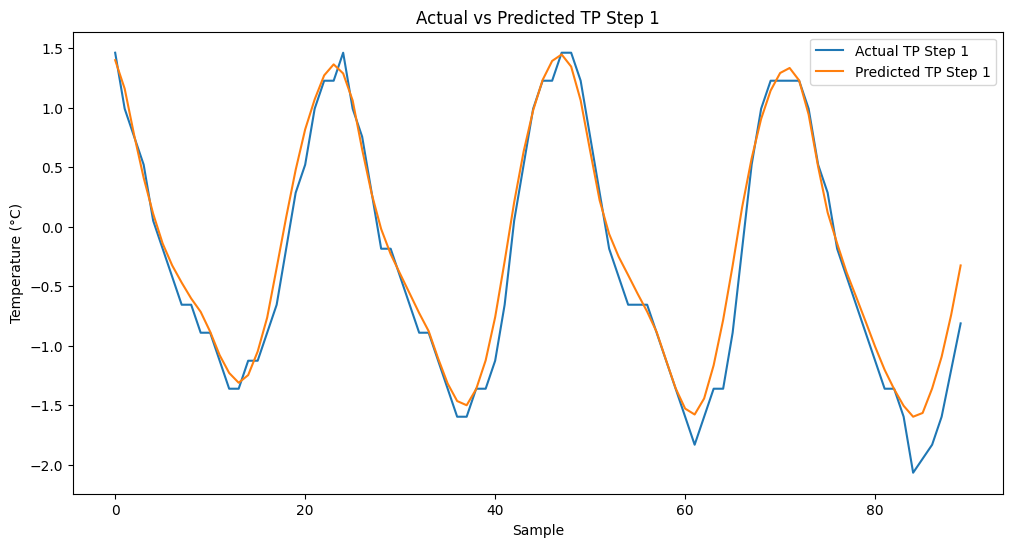

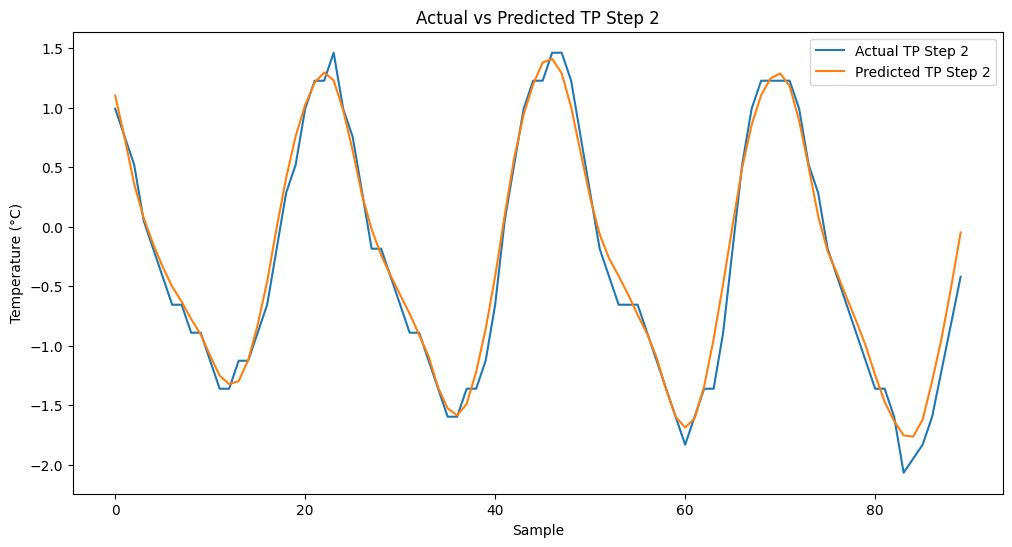

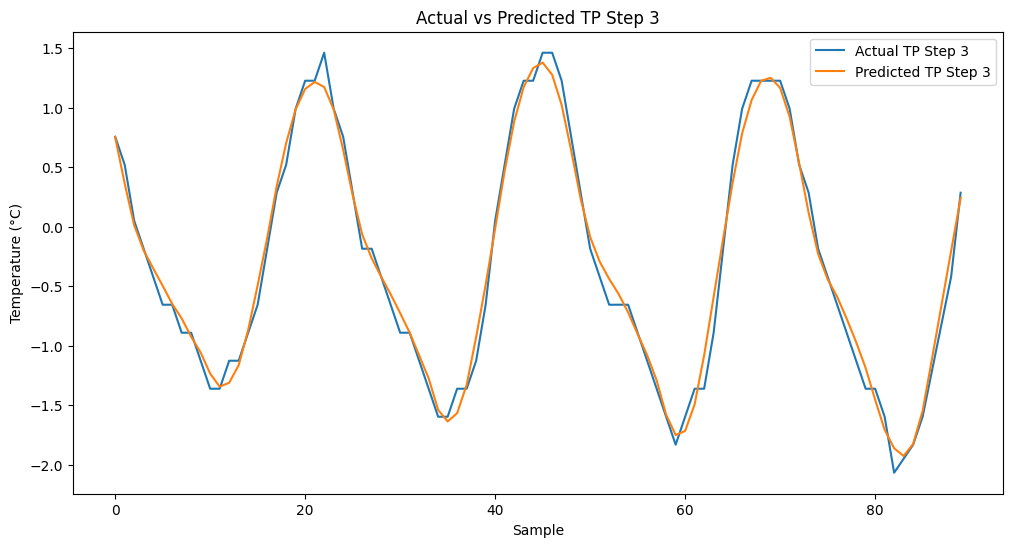

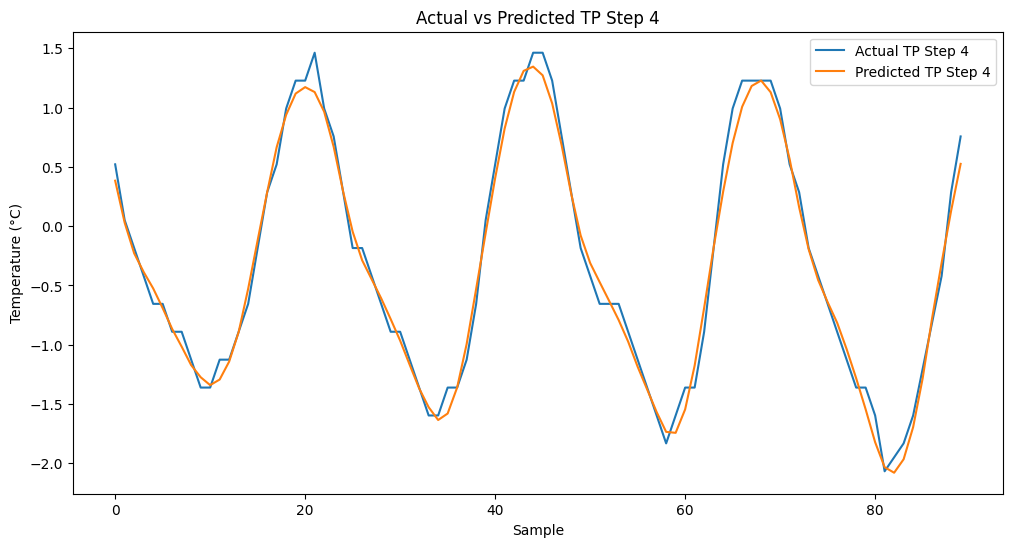

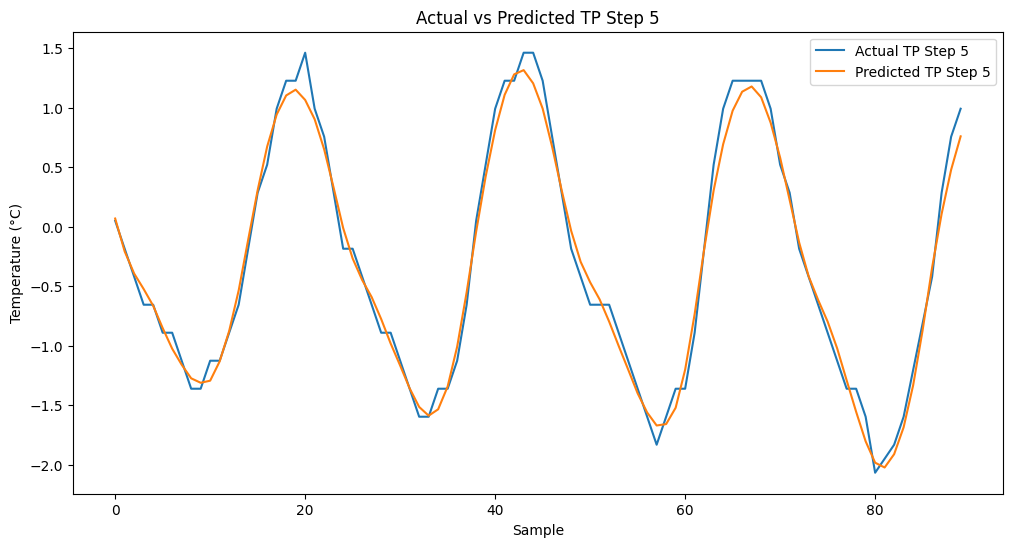

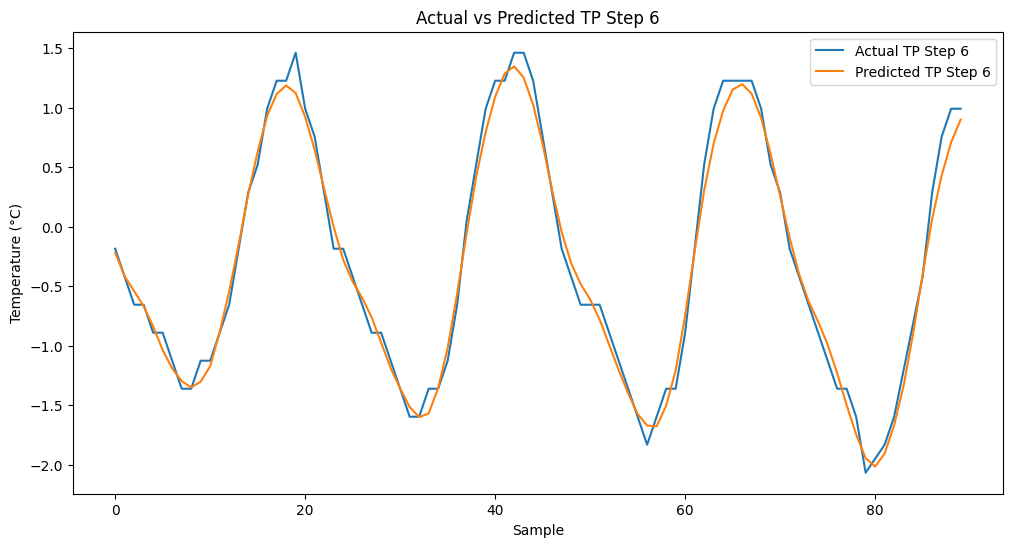

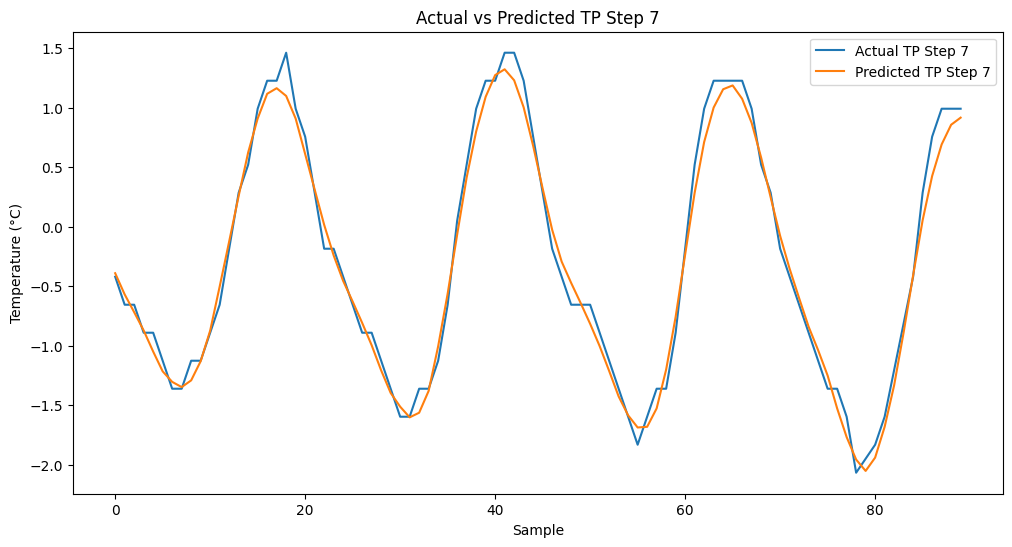

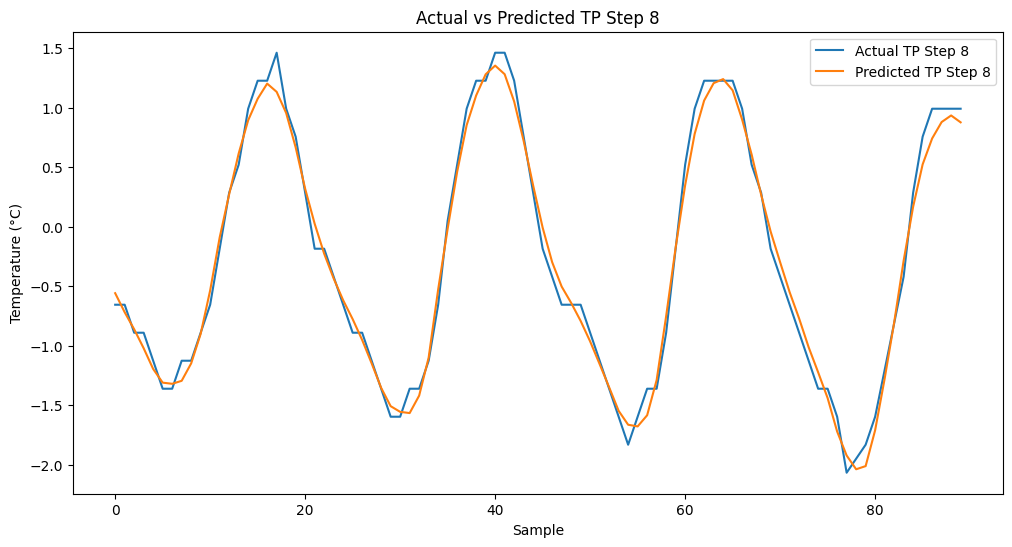

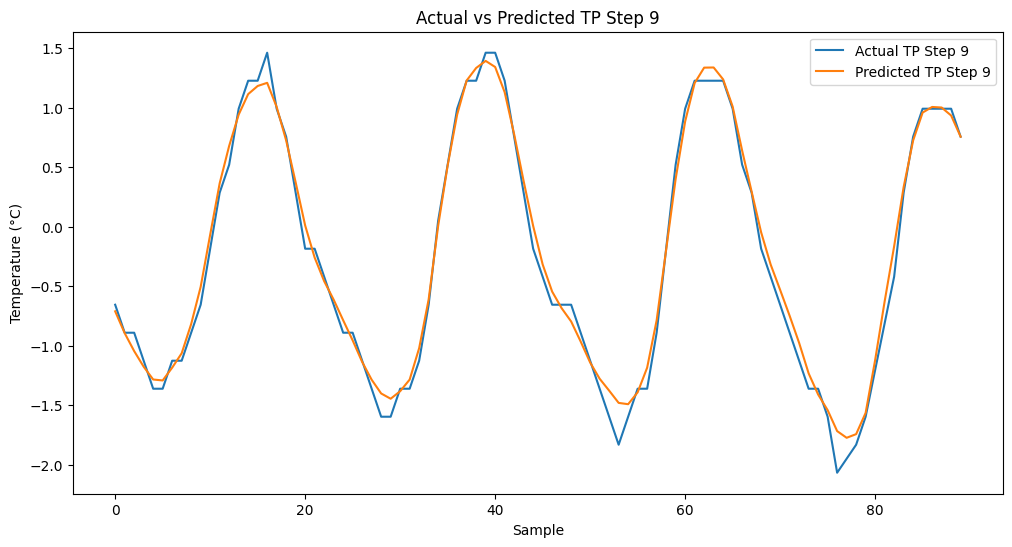

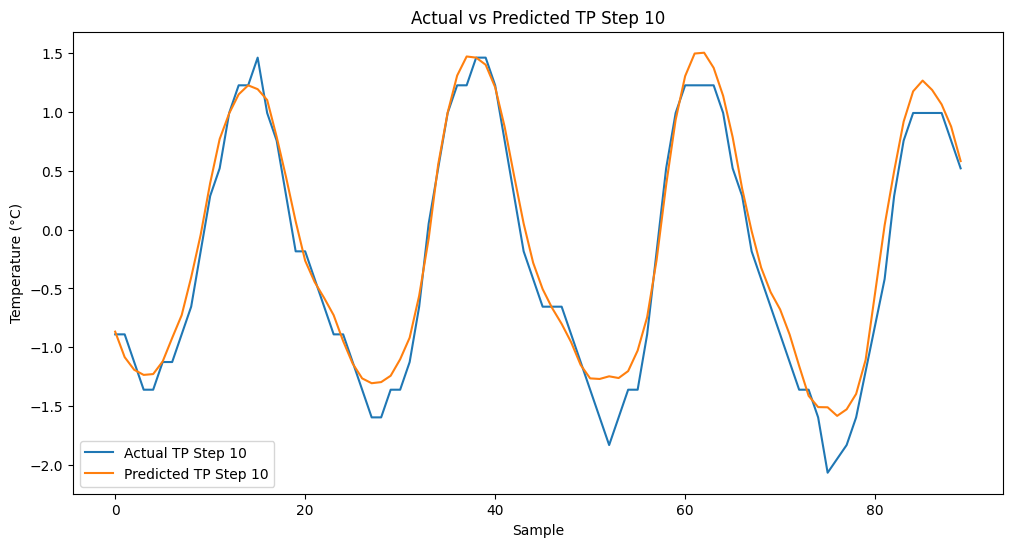

In [509]:

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values') * 100  # dalam persen

for i in range(steps):
    print(f'RMSE Step {i+1}: {rmse[i]:.2f}')
    print(f'MAPE Step {i+1}: {mape[i]:.2f}%')

steps_to_plot = 10
for i in range(steps_to_plot):
    plt.figure(figsize=(12,6))
    plt.plot(y_test[:, i], label=f'Actual TP Step {i+1}')
    plt.plot(y_pred[:, i], label=f'Predicted TP Step {i+1}')
    plt.title(f'Actual vs Predicted TP Step {i+1}')
    plt.xlabel('Sample')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

Memprediksi suhu (temperature) dalam jangka waktu tertentu menggunakan model yang sudah dilatih. Fungsi ini bisa digunakan untuk melakukan prediksi suhu jangka panjang, misalnya untuk memprediksi suhu dalam 10 jam ke depan berdasarkan data cuaca yang tersedia seperti kelembapan (humidity) dan indeks UV (uv_index).

In [510]:
def predict_tp_10_steps(model, scaler, new_data, steps=10):
    if len(new_data) < steps:
        raise ValueError(f'new_data harus memiliki minimal {steps} baris')

    recent_data = new_data.iloc[-steps:]
    scaled_recent = scaler.transform(recent_data)

    input_data = np.expand_dims(scaled_recent, axis=0)
    prediction = model.predict(input_data)
    tp_scaler = scaler.scale_[2]
    tp_mean = scaler.mean_[2]
    predicted_tp = prediction[0] * tp_scaler + tp_mean  # Mengembalikan skala asli

    return predicted_tp.tolist()

In [512]:

from tensorflow.keras.models import load_model # type: ignore

model = load_model('temperature_prediction_model.keras')
scaler = joblib.load('scaler.save')

latest_data = pd.DataFrame({
    'humidity': [1,1,1,1,1,1,0,0,0,0],
    'uv_index': [0,0,1,3,4,5,6,5,5,4],
    'temperature': [26,25,25,24,23,23,24,25,25,27]
})

predicted_tp = predict_tp_10_steps(model, scaler, latest_data, steps=10)
print(f'Predicted TP 10 minutes ahead: {predicted_tp}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted TP 10 minutes ahead: [24.000661849975586, 24.28525733947754, 24.52735137939453, 25.534889221191406, 25.816930770874023, 26.810894012451172, 27.155258178710938, 27.635860443115234, 28.153745651245117, 28.46259307861328]


## GRU

In [ ]:
from tensorflow.keras.layers import GRU, Dense, Dropout # type: ignore

# Definisikan arsitektur model GRU
model_gru = Sequential()
model_gru.add(GRU(100, activation='relu', input_shape=(steps, X_train.shape[2])))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(steps))  # Output layer dengan 10 unit untuk 10 langkah ke depan

# Kompilasi model
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

model_gru.summary()

c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 100)            │        31,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,510 (126.99 KB)

 Trainable params: 32,510 (126.99 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop_gru = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model GRU
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop_gru],
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9368 - mae: 0.8378 - mape: 104.9217 - val_loss: 0.8893 - val_mae: 0.8297 - val_mape: 90.3399
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6487 - mae: 0.6904 - mape: 98.6650 - val_loss: 0.6313 - val_mae: 0.6692 - val_mape: 82.6858
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3829 - mae: 0.5151 - mape: 105.5238 - val_loss: 0.2966 - val_mae: 0.4173 - val_mape: 69.6975
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1861 - mae: 0.3458 - mape: 103.9555 - val_loss: 0.1182 - val_mae: 0.2637 - val_mape: 44.3434
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1168 - mae: 0.2713 - mape: 81.2529 - val_loss: 0.0861 - val_mae: 0.2186 - val_mape: 37.1658
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0931 - mae: 0.2388 - mape: 71.2621 - val_loss: 0.0714 - val_mae: 0.1995 - val_mape: 34.0660
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0755 - mae: 0.216

In [ ]:
import os
os.makedirs('model', exist_ok=True)
model_gru.save('model/tp_prediction_model_gru.keras')


In [ ]:
# Prediksi pada data pengujian
y_pred_gru = model_gru.predict(X_test)

# Menghitung RMSE dan MAPE untuk setiap langkah ke depan
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru, multioutput='raw_values'))
mape_gru = mean_absolute_percentage_error(y_test, y_pred_gru, multioutput='raw_values') * 100  # dalam persen

for i in range(steps):
    print(f'GRU - RMSE Step {i+1}: {rmse_gru[i]:.2f}')
    print(f'GRU - MAPE Step {i+1}: {mape_gru[i]:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
GRU - RMSE Step 1: 0.28
GRU - MAPE Step 1: 38.66%
GRU - RMSE Step 2: 0.22
GRU - MAPE Step 2: 31.02%
GRU - RMSE Step 3: 0.16
GRU - MAPE Step 3: 23.51%
GRU - RMSE Step 4: 0.13
GRU - MAPE Step 4: 20.31%
GRU - RMSE Step 5: 0.13
GRU - MAPE Step 5: 16.56%
GRU - RMSE Step 6: 0.11
GRU - MAPE Step 6: 13.92%
GRU - RMSE Step 7: 0.11
GRU - MAPE Step 7: 15.46%
GRU - RMSE Step 8: 0.12
GRU - MAPE Step 8: 15.78%
GRU - RMSE Step 9: 0.13
GRU - MAPE Step 9: 15.94%
GRU - RMSE Step 10: 0.22
GRU - MAPE Step 10: 29.32%


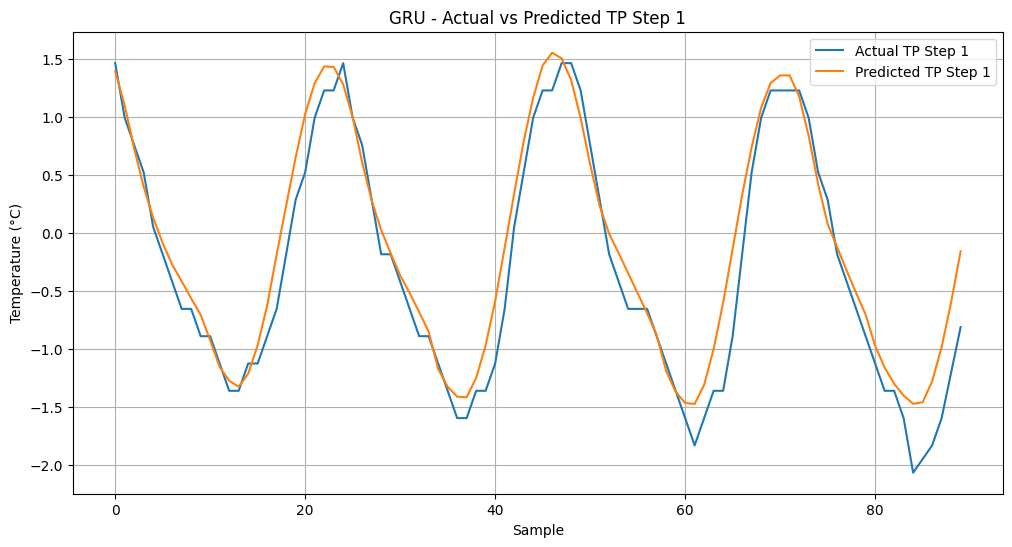

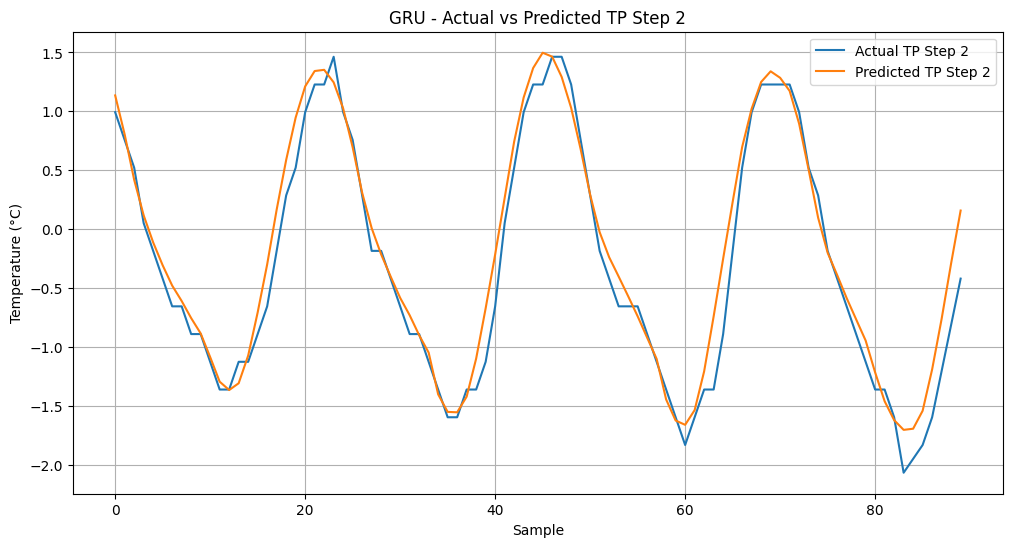

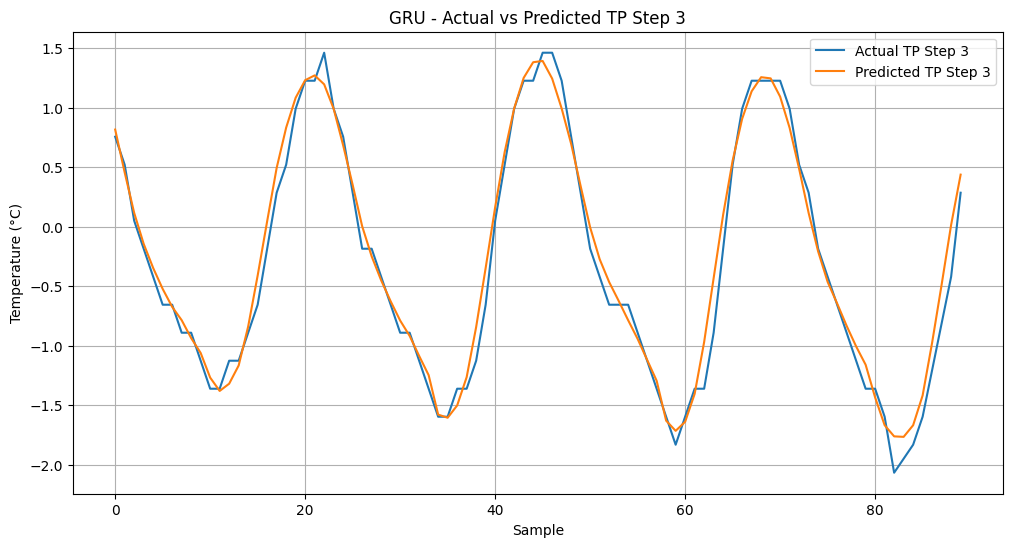

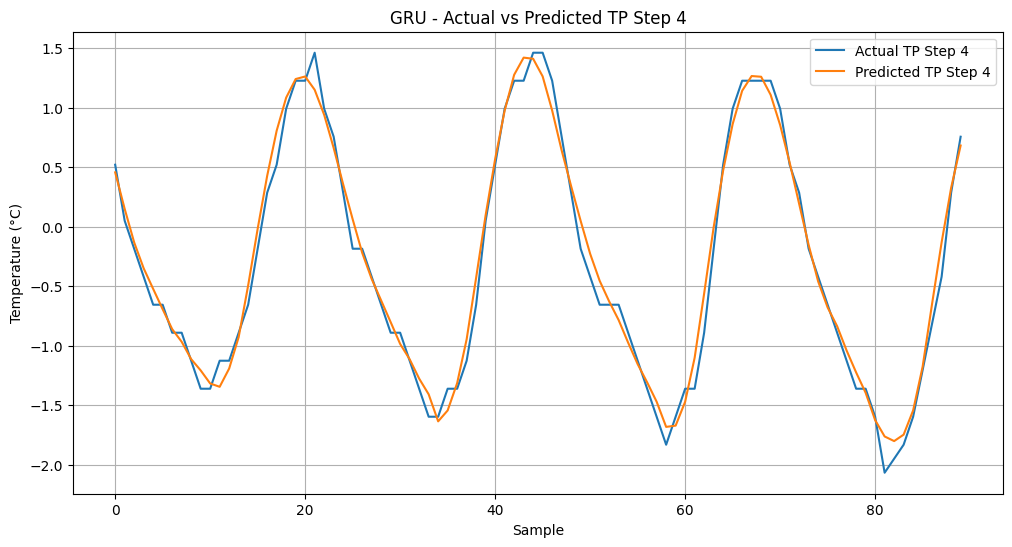

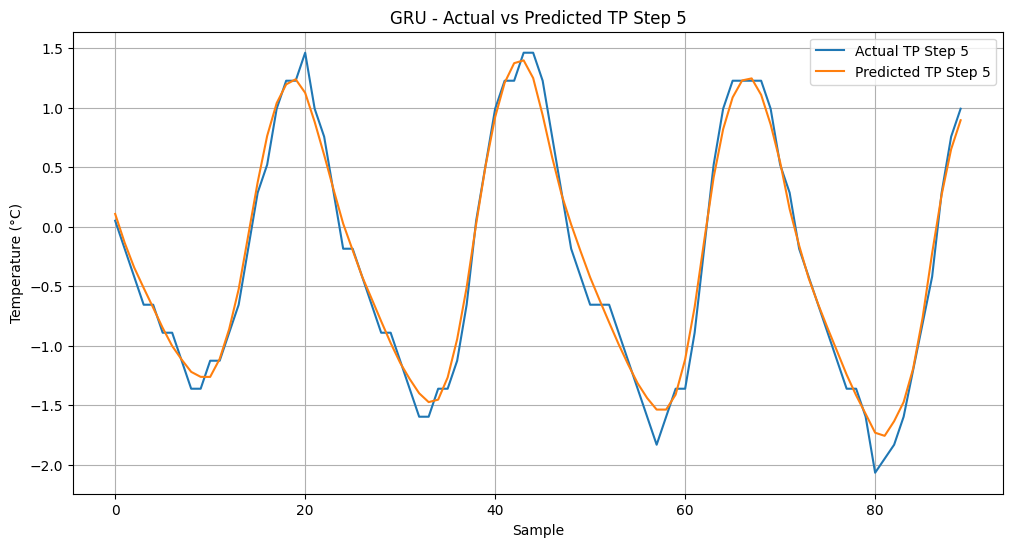

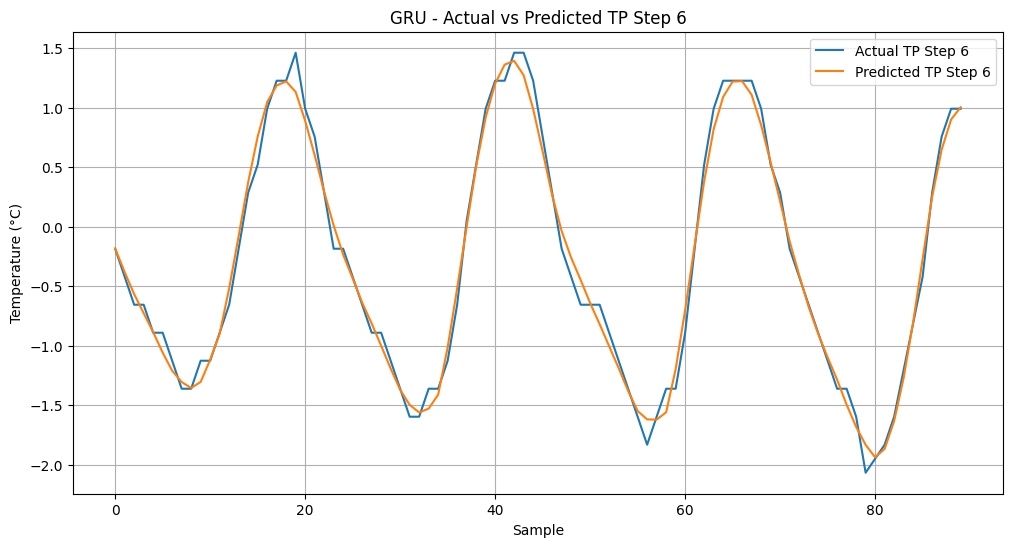

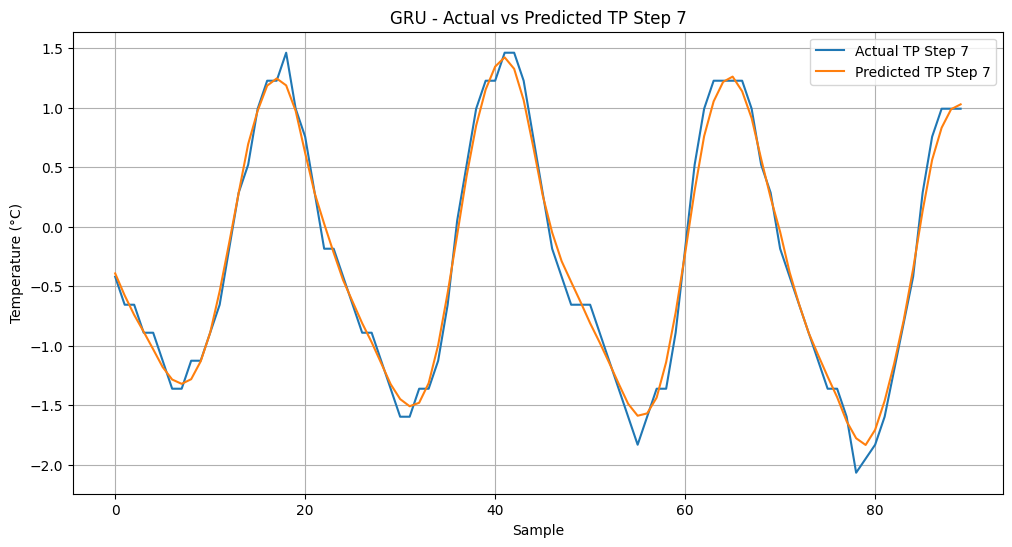

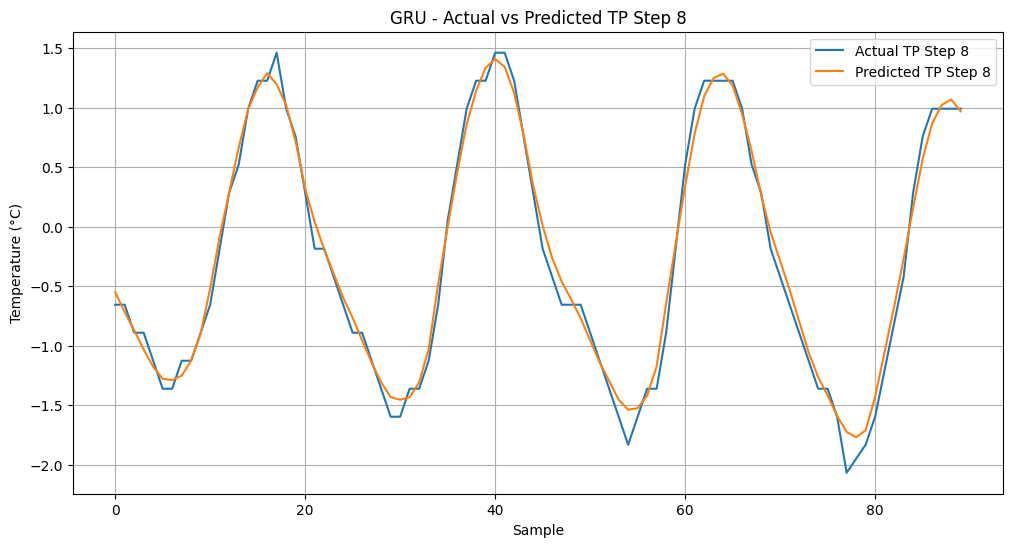

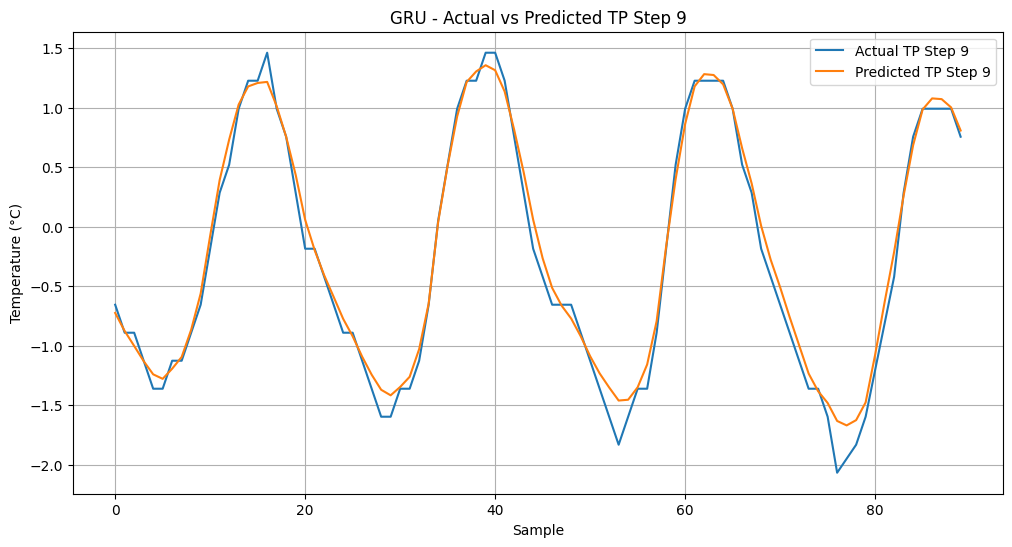

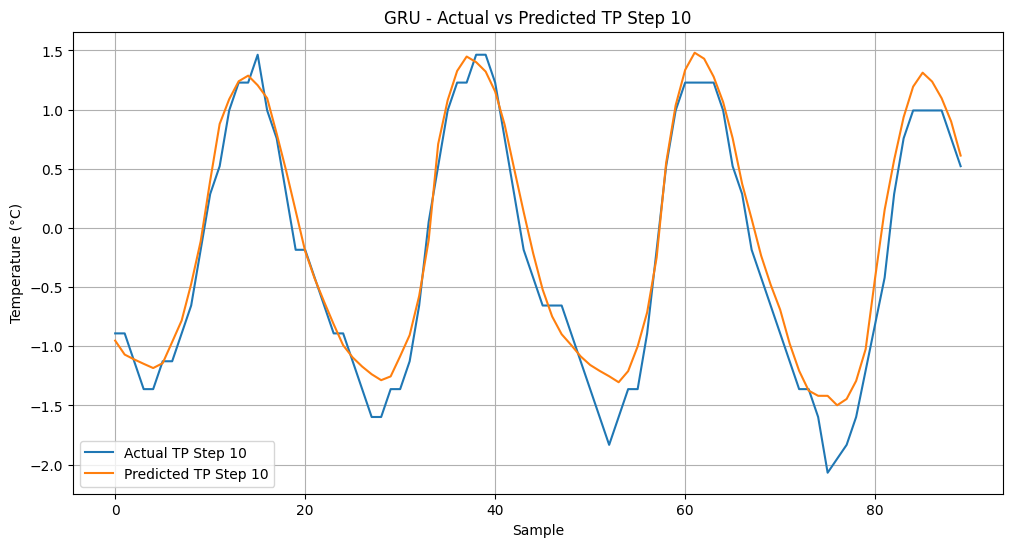

In [ ]:

# Visualisasi Prediksi vs Aktual untuk 3 langkah pertama
steps_to_plot = 10
for i in range(steps_to_plot):
    plt.figure(figsize=(12,6))
    plt.plot(y_test[:, i], label=f'Actual TP Step {i+1}')
    plt.plot(y_pred_gru[:, i], label=f'Predicted TP Step {i+1}')
    plt.title(f'GRU - Actual vs Predicted TP Step {i+1}')
    plt.xlabel('Sample')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# WEBSITE HASIL

https://huggingface.co/spaces/NikiRaihan/PSD_Prediksi-Temperatur-PerJam-Kedepan